In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix ,roc_auc_score, log_loss
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/Users/roya/Downloads/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [4]:
df.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
print(f'number of duplicated data: {len(df[df.duplicated()])}')

number of duplicated data: 13


In [7]:
df = df.drop_duplicates()

In [8]:
print(f'number of duplicated data: {len(df[df.duplicated()])}')

number of duplicated data: 0


In [9]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [10]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

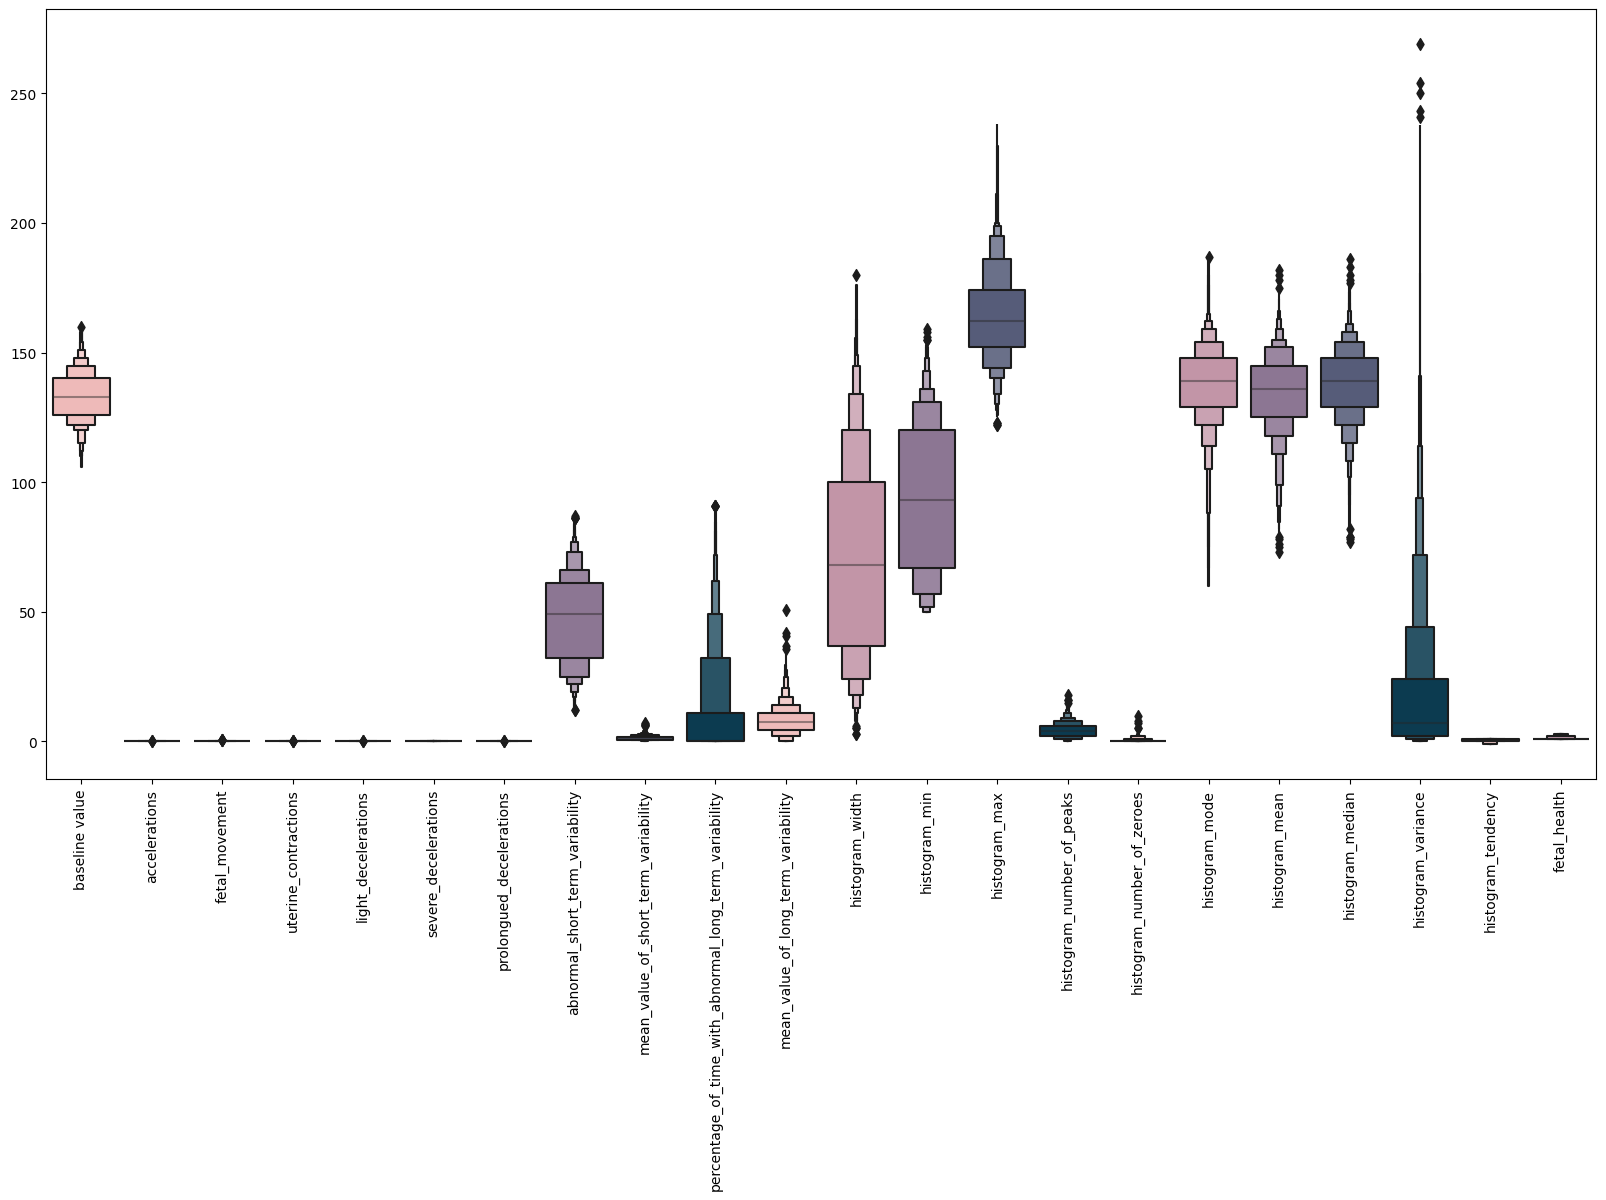

In [11]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize = (20,10))
sns.boxenplot(data = df, palette = shades)
plt.xticks(rotation = 90)
plt.show()

In [12]:
threshold = 1.5

df2 = df.copy()

for column in df2.columns:
    if np.issubdtype(df2[column].dtype, np.number):
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + threshold * IQR
        lower_bound = Q1 - threshold * IQR
        
        df2 = df2[(df2[column] <= upper_bound) & (df2[column] >= lower_bound)]

df2.to_csv('/Users/roya/Downloads/filtered_data.csv', index=False)

In [13]:
df2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
49,158.0,0.005,0.0,0.008,0.001,0.0,0.0,27.0,1.7,0.0,...,77.0,197.0,7.0,0.0,170.0,168.0,170.0,14.0,1.0,1.0
50,158.0,0.005,0.0,0.008,0.000,0.0,0.0,29.0,1.3,0.0,...,142.0,197.0,4.0,0.0,170.0,171.0,172.0,9.0,0.0,1.0
57,146.0,0.000,0.0,0.006,0.000,0.0,0.0,39.0,0.8,38.0,...,148.0,166.0,1.0,0.0,154.0,155.0,156.0,1.0,0.0,1.0
58,148.0,0.000,0.0,0.005,0.000,0.0,0.0,41.0,0.8,29.0,...,143.0,163.0,1.0,0.0,154.0,153.0,154.0,0.0,0.0,1.0
59,144.0,0.008,0.0,0.007,0.000,0.0,0.0,33.0,1.1,0.0,...,78.0,178.0,5.0,0.0,149.0,152.0,152.0,8.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,140.0,0.004,0.0,0.004,0.000,0.0,0.0,80.0,0.2,36.0,...,140.0,158.0,1.0,0.0,147.0,148.0,149.0,1.0,0.0,1.0
2117,140.0,0.000,0.0,0.008,0.000,0.0,0.0,79.0,0.3,20.0,...,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1.0
2118,140.0,0.000,0.0,0.006,0.001,0.0,0.0,79.0,0.5,26.0,...,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1.0
2119,140.0,0.000,0.0,0.007,0.001,0.0,0.0,79.0,0.6,27.0,...,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1.0


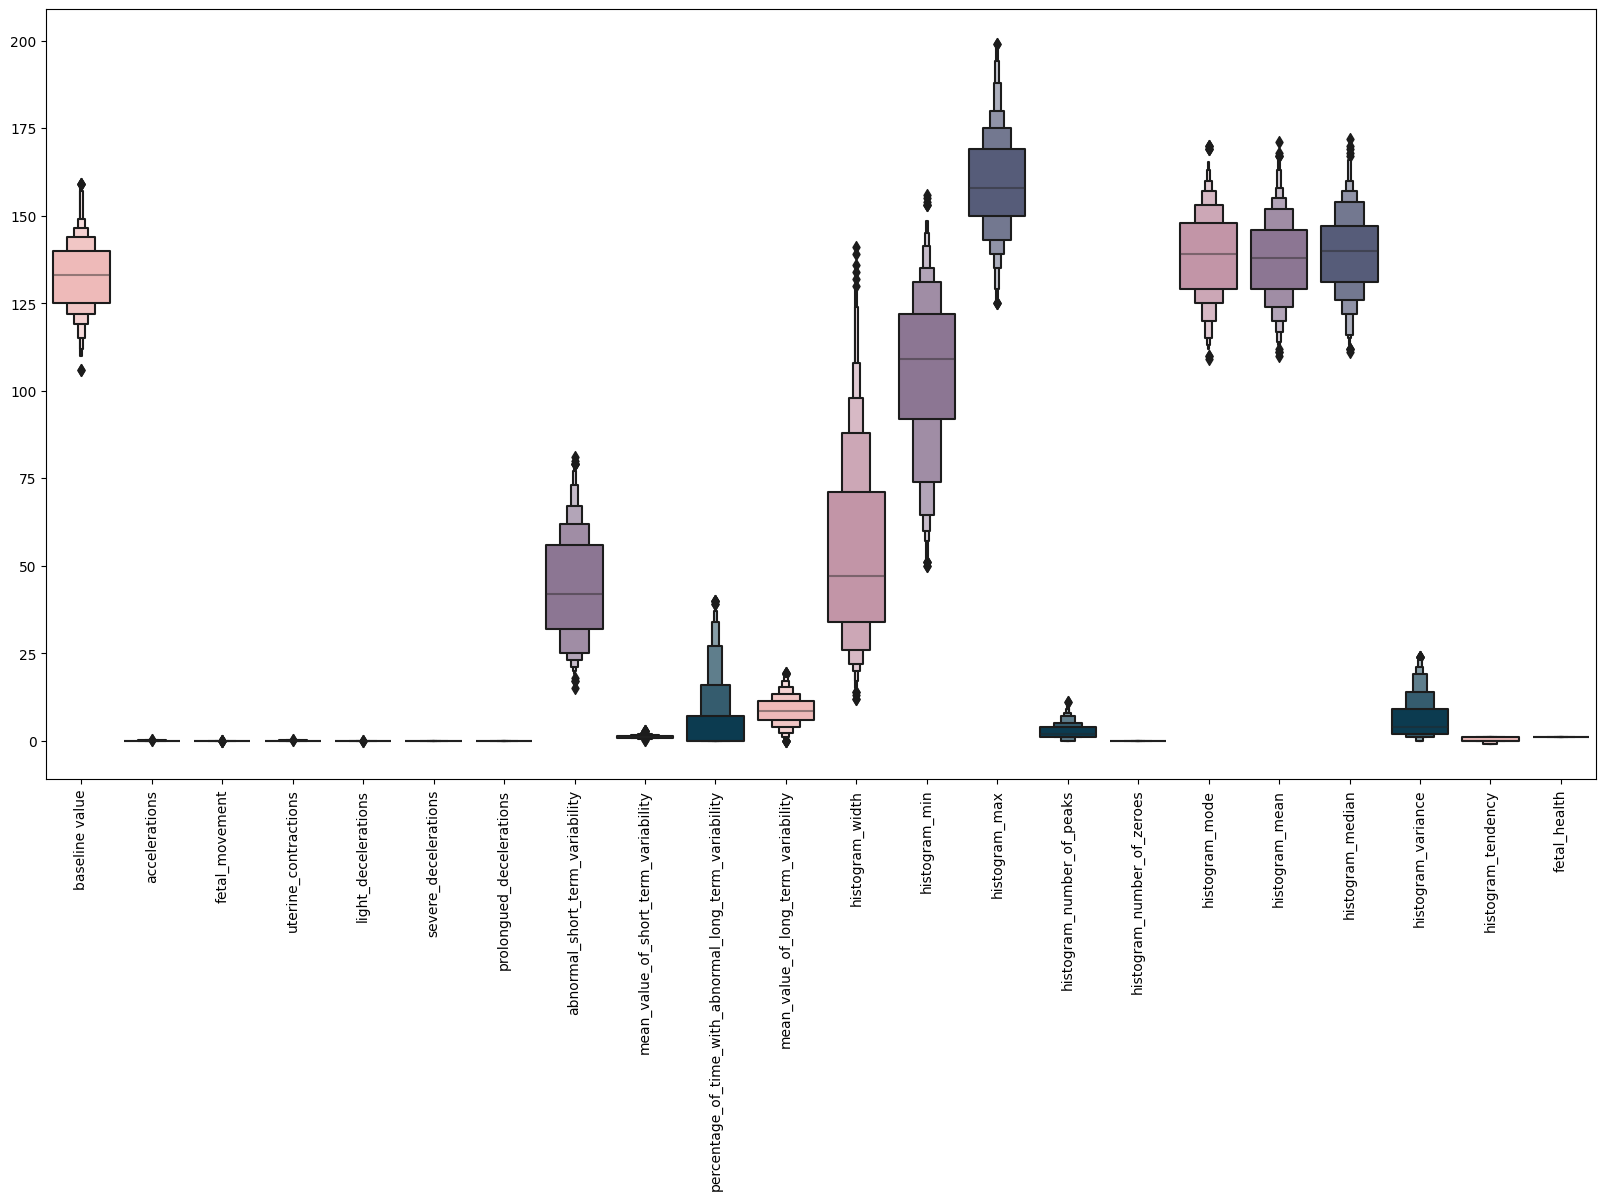

In [14]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize = (20,10))
sns.boxenplot(data = df2, palette = shades)
plt.xticks(rotation = 90)
plt.show()

In [15]:
df2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
49,158.0,0.005,0.0,0.008,0.001,0.0,0.0,27.0,1.7,0.0,...,77.0,197.0,7.0,0.0,170.0,168.0,170.0,14.0,1.0,1.0
50,158.0,0.005,0.0,0.008,0.000,0.0,0.0,29.0,1.3,0.0,...,142.0,197.0,4.0,0.0,170.0,171.0,172.0,9.0,0.0,1.0
57,146.0,0.000,0.0,0.006,0.000,0.0,0.0,39.0,0.8,38.0,...,148.0,166.0,1.0,0.0,154.0,155.0,156.0,1.0,0.0,1.0
58,148.0,0.000,0.0,0.005,0.000,0.0,0.0,41.0,0.8,29.0,...,143.0,163.0,1.0,0.0,154.0,153.0,154.0,0.0,0.0,1.0
59,144.0,0.008,0.0,0.007,0.000,0.0,0.0,33.0,1.1,0.0,...,78.0,178.0,5.0,0.0,149.0,152.0,152.0,8.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,140.0,0.004,0.0,0.004,0.000,0.0,0.0,80.0,0.2,36.0,...,140.0,158.0,1.0,0.0,147.0,148.0,149.0,1.0,0.0,1.0
2117,140.0,0.000,0.0,0.008,0.000,0.0,0.0,79.0,0.3,20.0,...,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1.0
2118,140.0,0.000,0.0,0.006,0.001,0.0,0.0,79.0,0.5,26.0,...,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1.0
2119,140.0,0.000,0.0,0.007,0.001,0.0,0.0,79.0,0.6,27.0,...,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1.0


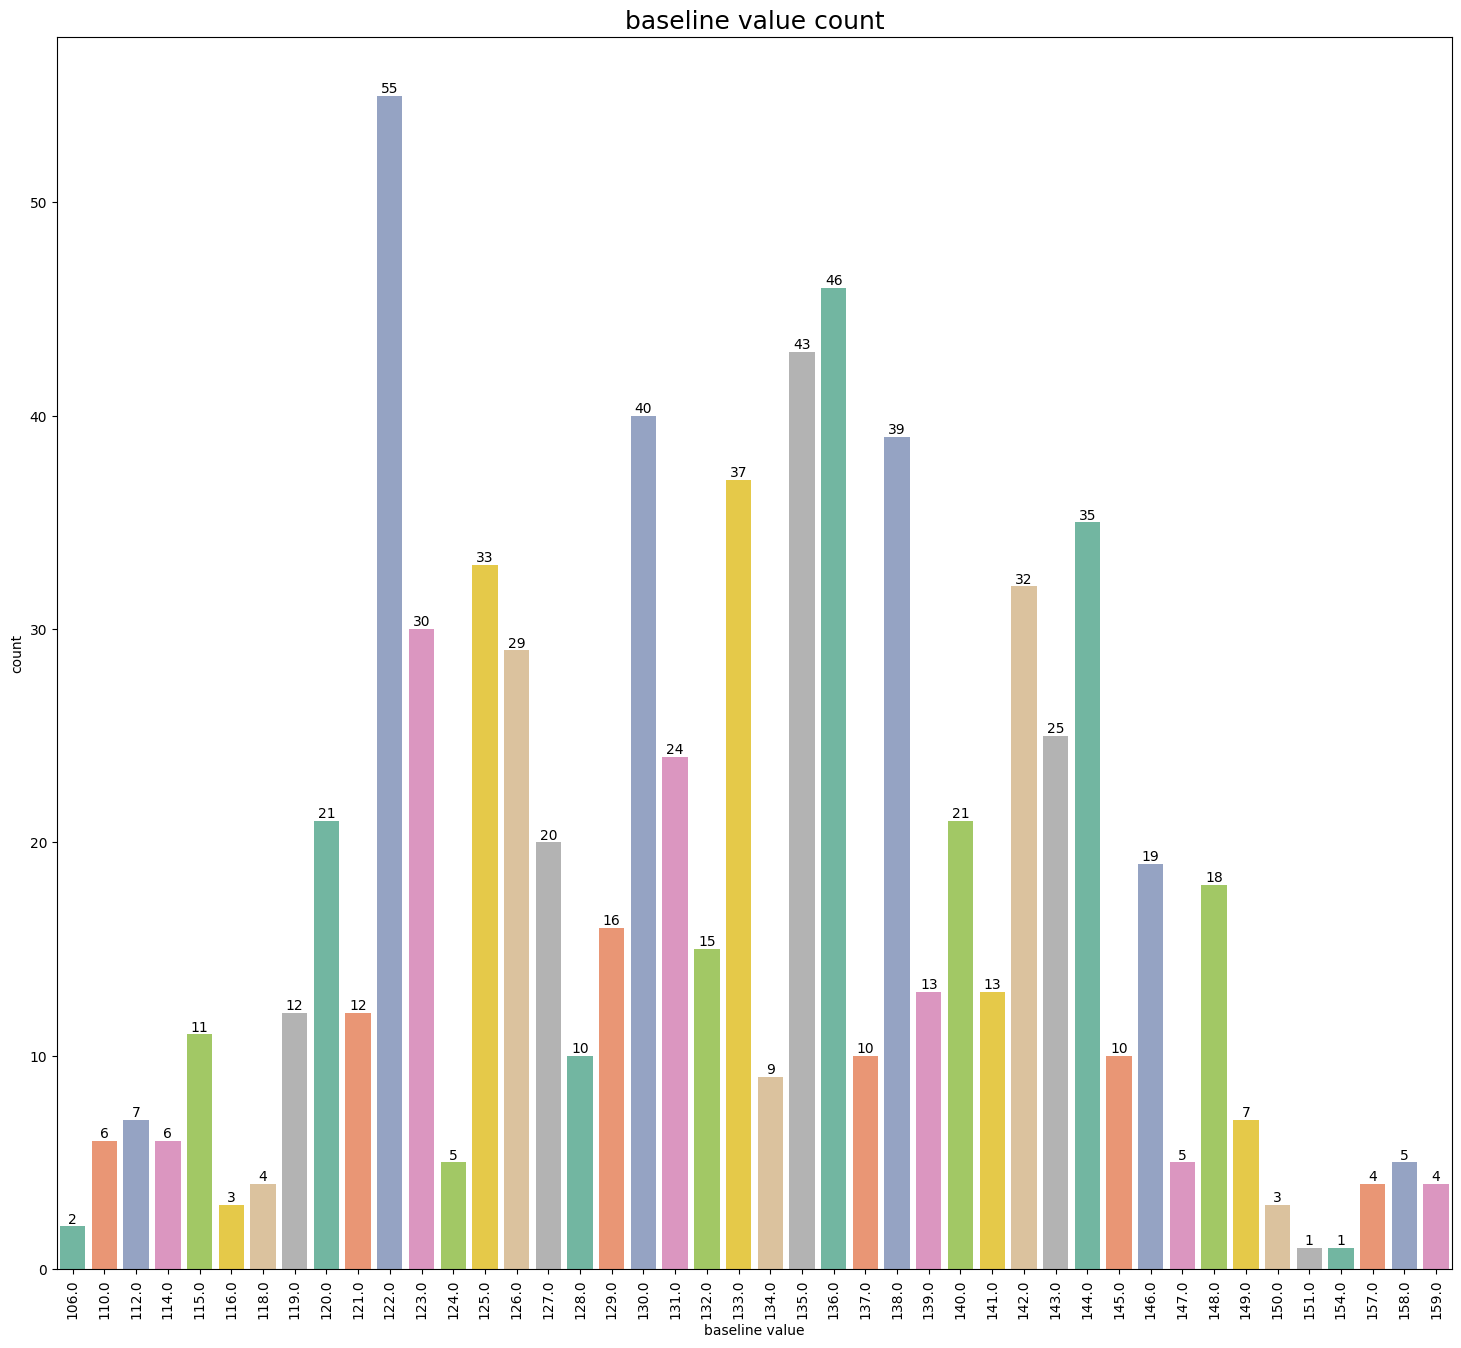

In [16]:
plt.figure(figsize = (18,16))
ax = sns.countplot(x = 'baseline value', data = df2, palette = 'Set2')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.title('baseline value count', fontsize = 18)
plt.show()

In [17]:
df2.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

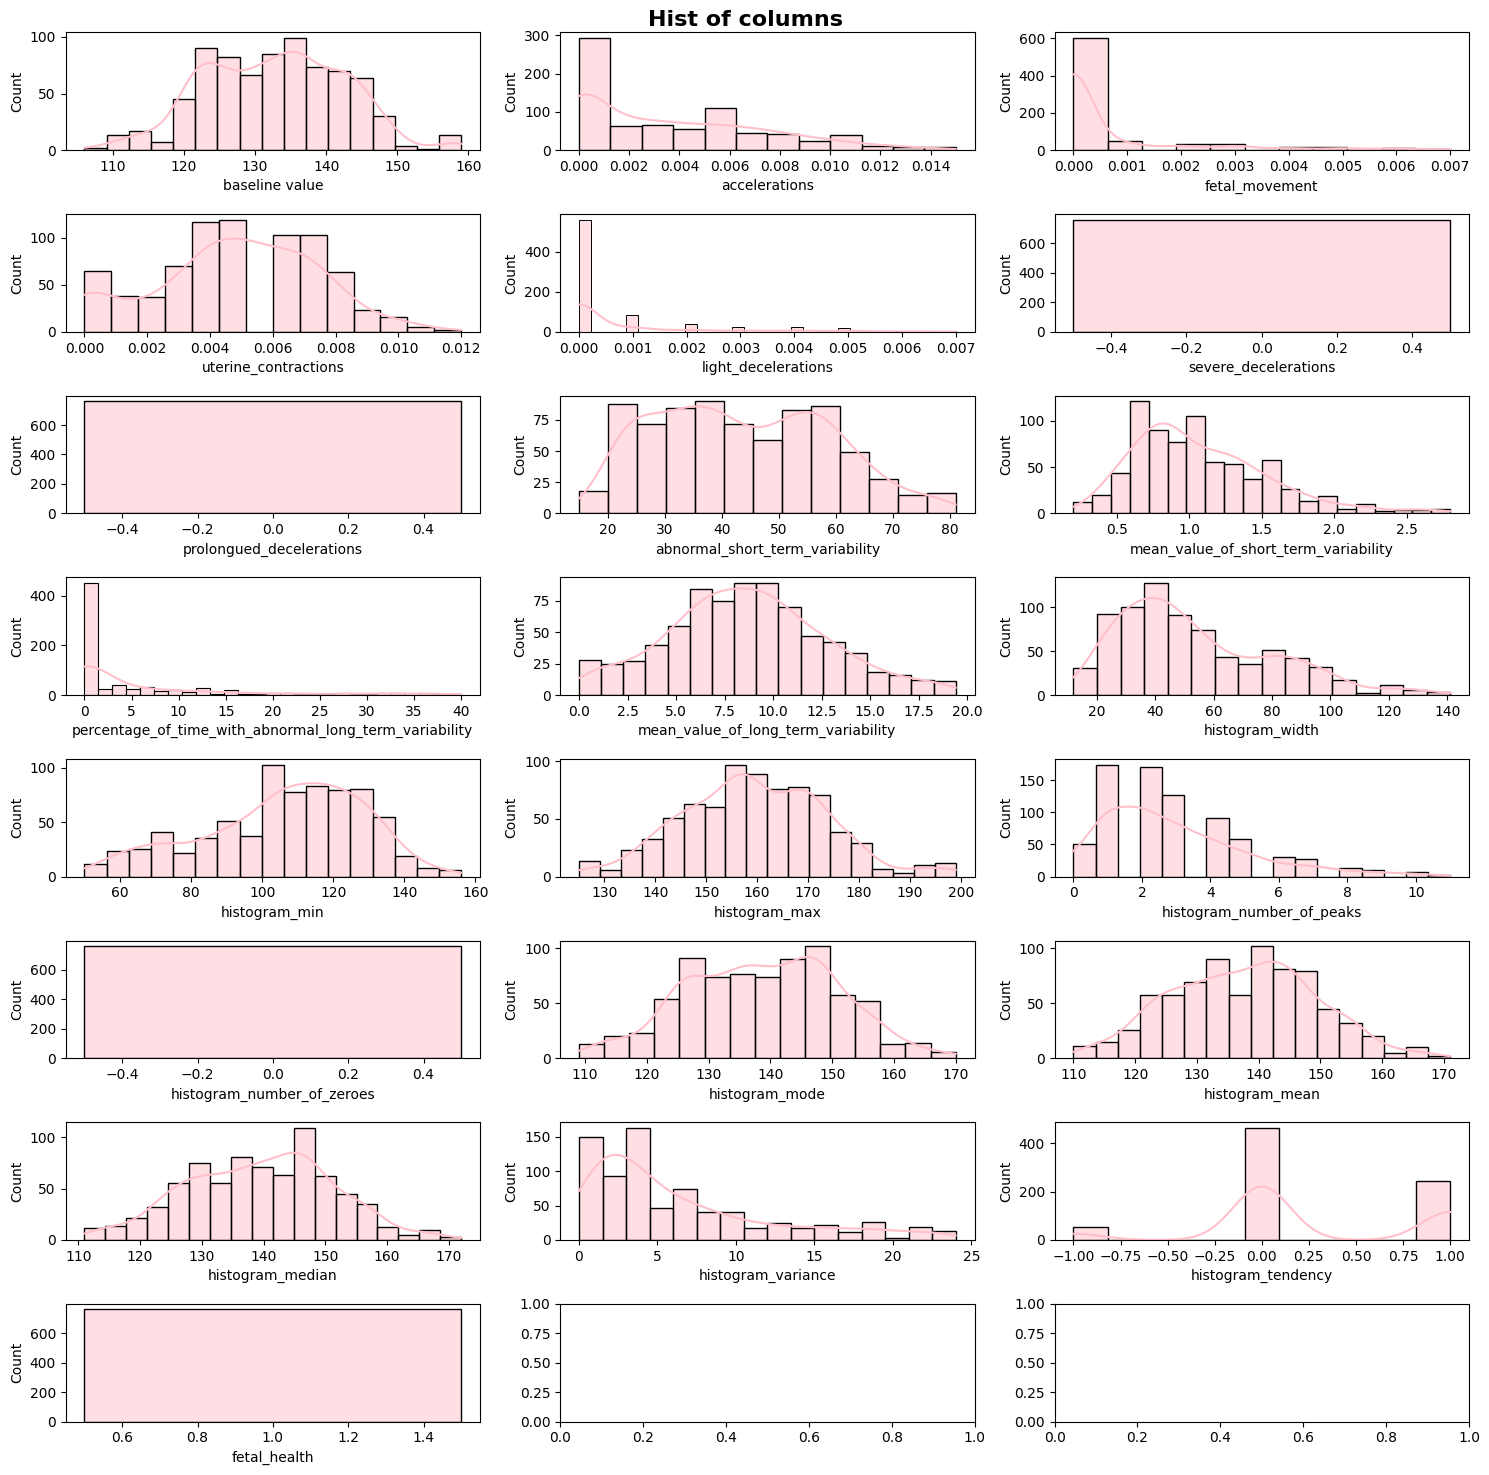

In [18]:
fig, axes = plt.subplots(figsize = (15, 15), nrows = 8, ncols = 3)
fig.suptitle('Hist of columns', fontsize = 16, fontweight = 'bold')

i = 0
j = 0
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health']

for col in columns:
    sns.histplot(ax = axes[i, j], data = df2, kde = True, x = col, color = 'pink')
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

<Axes: >

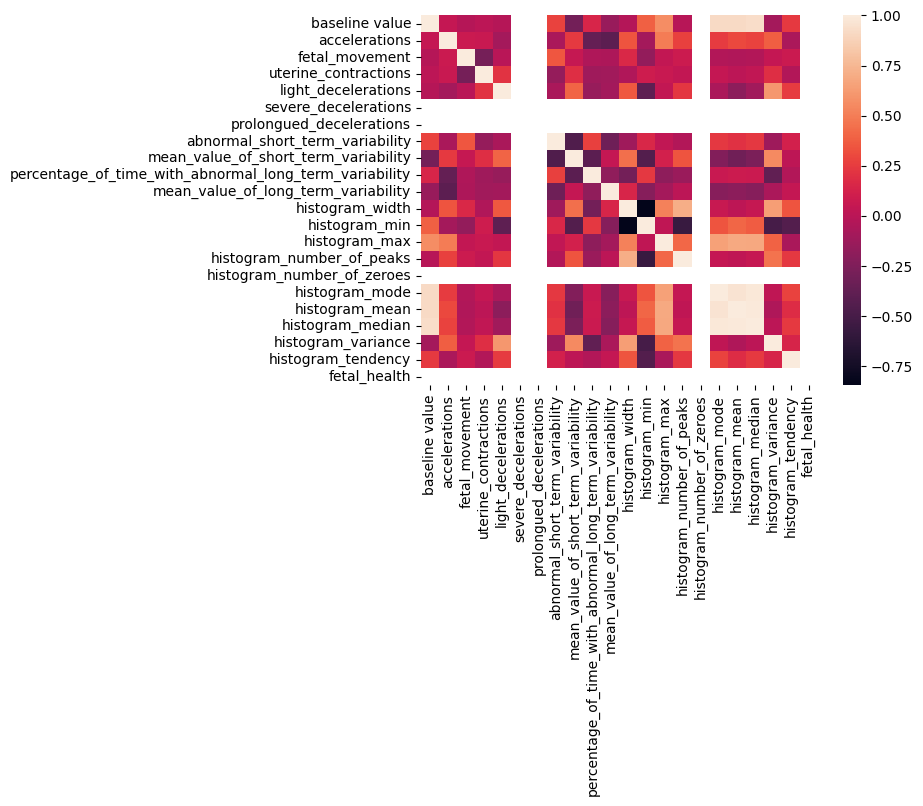

In [19]:
sns.heatmap(df2.corr())

In [20]:
X = df.drop(['mean_value_of_short_term_variability'], axis=1)
y = df['fetal_health']

X.shape, y.shape

((2113, 21), (2113,))

In [21]:
mi = mutual_info_classif(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': mi})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                              Feature  Importance
20                                       fetal_health    0.674844
8   percentage_of_time_with_abnormal_long_term_var...    0.181975
7                     abnormal_short_term_variability    0.177416
16                                     histogram_mean    0.164570
18                                 histogram_variance    0.147751
17                                   histogram_median    0.147428
15                                     histogram_mode    0.144509
1                                       accelerations    0.137196
10                                    histogram_width    0.133500
11                                      histogram_min    0.127403
0                                      baseline value    0.115233
6                            prolongued_decelerations    0.076034
9                 mean_value_of_long_term_variability    0.073886
12                                      histogram_max    0.069622
3         

In [22]:
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1691, 21), (422, 21), (1691,), (422,))

In [23]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
predictions = KNN_model.predict(X_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 1.,
       3., 3., 1., 1., 1., 1., 3., 3., 1., 1., 3., 3., 1., 1., 3., 1., 1.,
       1., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 3., 3., 3., 3., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3.,
       3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [25]:
KNN_model.score(X, y)

0.8906767628963559

In [26]:
Tree_model = DecisionTreeClassifier(max_depth=2)
Tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [27]:
prediction_Tree = Tree_model.predict(X_test)
prediction_Tree

array([1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3.,
       3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1.

In [28]:
score = Tree_model.score(X, y)
print(f'Score: {score}')

Score: 1.0


In [29]:
accuracy = accuracy_score(y_test, prediction_Tree)
precision = precision_score(y_test, prediction_Tree, average='weighted', zero_division=1)
recall = recall_score(y_test, prediction_Tree, average='weighted')
f1 = f1_score(y_test, prediction_Tree, average='weighted')

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')

Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


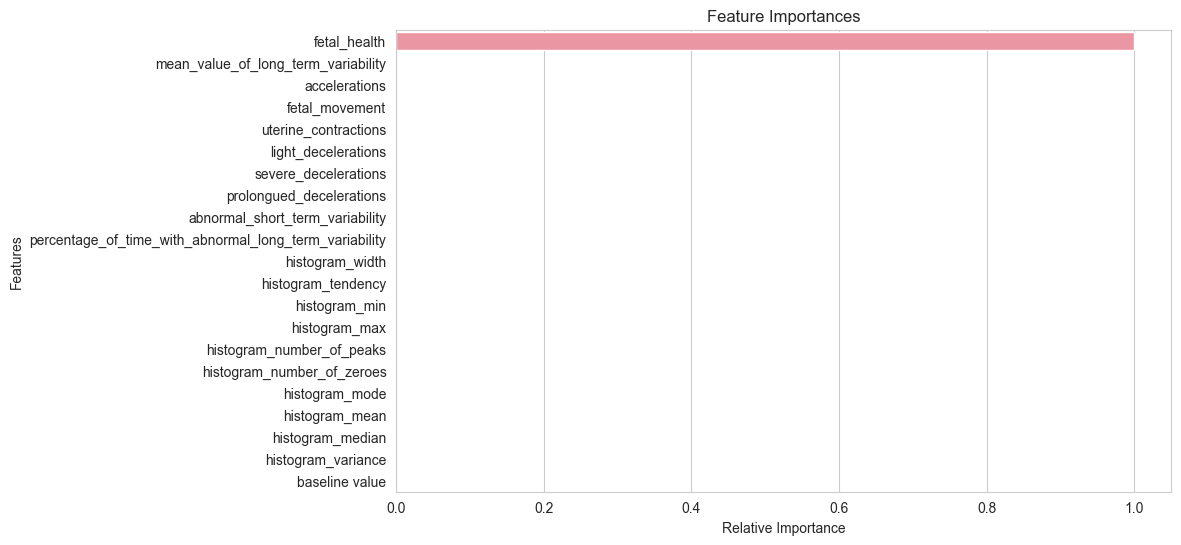

In [30]:
importances = Tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

In [31]:
LogR_model = LogisticRegression(solver='liblinear')
LogR_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [35]:
predictions_LogR = LogR_model.predict(X_test)
predictions_LogR

array([1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3.,
       3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1.

In [36]:
accuracy = accuracy_score(y_test, predictions_LogR)
precision = precision_score(y_test, predictions_LogR, average = 'weighted')
recall = recall_score(y_test, predictions_LogR, average = 'weighted')
f1 = f1_score(y_test, predictions_LogR, average = 'weighted')
cm = confusion_matrix(y_test, predictions_LogR)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[336   0   0]
 [  0   5   0]
 [  0   0  81]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [37]:
reports = {}
model_names = ['KNN_model', 'Tree_model', 'LogR_model']
model_objects = [KNN_model, Tree_model, LogR_model]

for name, model in zip(model_names, model_objects):
    prediction = model.predict(X_test)
    report = classification_report(y_test, prediction, output_dict = True, zero_division = 1)
    reports[name] = report

    print(f"Classification Report ({name}):")
    print(classification_report(y_test, prediction, zero_division = 1))


metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    print(f"\n{metric.capitalize()} Comparison: ")
    for name, report in reports.items():
        if metric in report['weighted avg']:
            print(f"{name}: {report['weighted avg'][metric]:.3f}")
        else:
            print(f"{name}: Not Available")

Classification Report (KNN_model):
              precision    recall  f1-score   support

         1.0       0.86      0.83      0.84       336
         2.0       0.04      0.40      0.07         5
         3.0       0.86      0.44      0.59        81

    accuracy                           0.75       422
   macro avg       0.58      0.56      0.50       422
weighted avg       0.85      0.75      0.78       422

Classification Report (Tree_model):
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       336
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        81

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

Classification Report (LogR_model):
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       336
         2.0       1.0

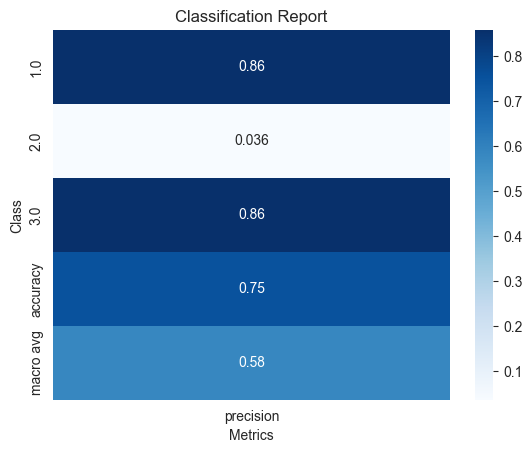

In [40]:
report = classification_report(y_test, predictions, output_dict = True)
df = pd.DataFrame(report).transpose()

sns.heatmap(df.iloc[:-1, :-3], annot = True, cmap = "Blues")
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

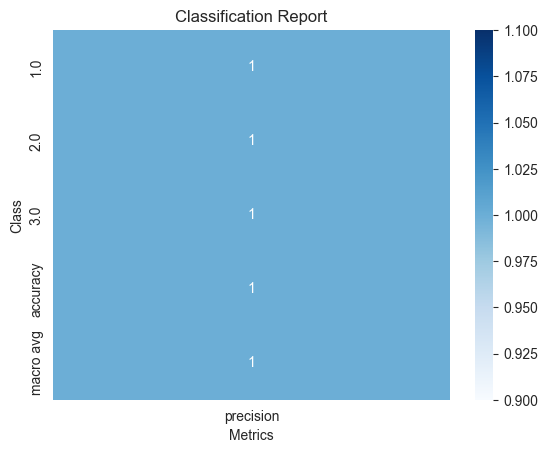

In [41]:
report = classification_report(y_test, prediction_Tree, output_dict = True)
df = pd.DataFrame(report).transpose()

sns.heatmap(df.iloc[:-1, :-3], annot = True, cmap = "Blues")
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

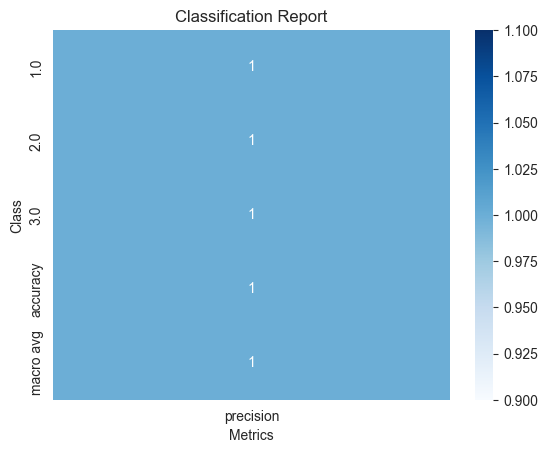

In [42]:
report = classification_report(y_test, predictions_LogR, output_dict = True)
df = pd.DataFrame(report).transpose()

sns.heatmap(df.iloc[:-1, :-3], annot = True, cmap = "Blues")
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()